# Importar dados

In [1]:
import pandas as pd
train_data = pd.read_csv(r'../data/train.csv')
test_data = pd.read_csv(r'../data/test.csv')

In [2]:
train_data.shape

(112, 4)

# Analisar Dados

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         112 non-null    int64
 1   age        112 non-null    int64
 2   sex        112 non-null    int64
 3   education  112 non-null    int64
dtypes: int64(4)
memory usage: 3.6 KB


In [4]:
train_data.describe()

,id,age,sex,education
count,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714
std,32.475632,22.642156,0.501927,4.909870
min,1.000000,13.000000,0.000000,0.000000
25%,28.750000,20.000000,0.000000,4.000000
50%,56.500000,51.500000,0.000000,9.000000
75%,84.250000,65.250000,1.000000,12.000000
max,112.000000,79.000000,1.000000,20.000000


In [5]:
#fig = plt.figure(figsize = (20,5))
#ax = fig.gca()
#train_data['education'].hist(ax = ax)
train_data.head()

,id,age,sex,education
0,1,13,1,7
1,2,14,0,8
2,3,15,1,9
3,4,15,1,9
4,5,15,1,9


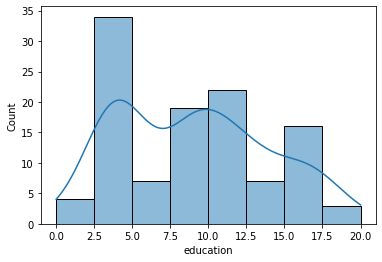

In [6]:
#train_data.isna().any()

import seaborn as sns
#sns.histplot(train_data['age'], kde='True')
#sns.histplot(train_data['sex'], kde='True')
sns.histplot(train_data['education'], kde='True')

#sns.boxplot(x=train_data['age'])
#sns.boxplot(x=train_data['sex'])
#sns.boxplot(x=train_data['education'])

import matplotlib.pyplot as plt
#corr_matrix = train_data.corr()
#f, ax = plt.subplots(figsize=(8,6))
#sns.heatmap(corr_matrix, vmin=1, vmax=1, square=True, annot=True)

# Tratar Dados

In [7]:
education_train = []
for ar in zip(train_data['education']):
    age = ar[0]
    if age > 16:
        education_train.append('Muito Alta')
    elif age > 12: 
        education_train.append('Alta')
    elif age > 8: 
        education_train.append('Normal')
    elif age > 4:
        education_train.append('Baixa')
    else:
        education_train.append('Muito Baixa')

education_test = []
for ar in zip(test_data['education']):
    age = ar[0]
    if age > 16:
        education_test.append('Muito Alta')
    elif age > 12: 
        education_test.append('Alta')
    elif age > 8: 
        education_test.append('Normal')
    elif age > 4:
        education_test.append('Baixa')
    else:
        education_test.append('Muito Baixa')

train_data['education'] = education_train
test_data['education'] = education_test

In [8]:
train_data.head()

,id,age,sex,education
0,1,13,1,Baixa
1,2,14,0,Baixa
2,3,15,1,Normal
3,4,15,1,Normal
4,5,15,1,Normal


# Visualisar os dados

In [9]:
import numpy as np
import scipy.io

mat = scipy.io.loadmat('../data/train_data.mat')

X = mat["train_data"]
print(X)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.02631835 0.01242944 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.01770987 0.         0.        ]]

 [[0.13152513 0.11770353 0.15580596 ... 0.11608478 0.15665442 0.11458643]
  [0.         0.      

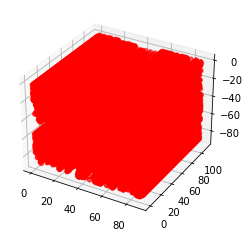

In [10]:
#todos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z,x,y = X.nonzero()
            
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.show()

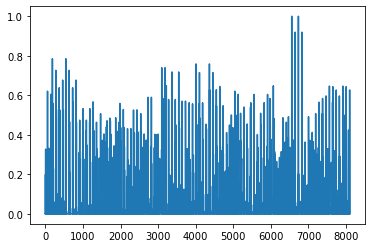

In [11]:
#Exemplo 1 pessoa
store = []
for i in range(90):
    for j in range (90):
        store.append(X[i][j][15])
        #print(X[i][j][0])
        
plt.plot(store)

# Importar matrizes de conectividade

In [13]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_mat, test_mat = get_data_from_mat('../data/train_data.mat','../data/test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


# Treinar o modelo 1 - Utilizar os dados das matrizes e apenas as labels do csv


In [14]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2695173226368300852
xla_global_id: -1
]


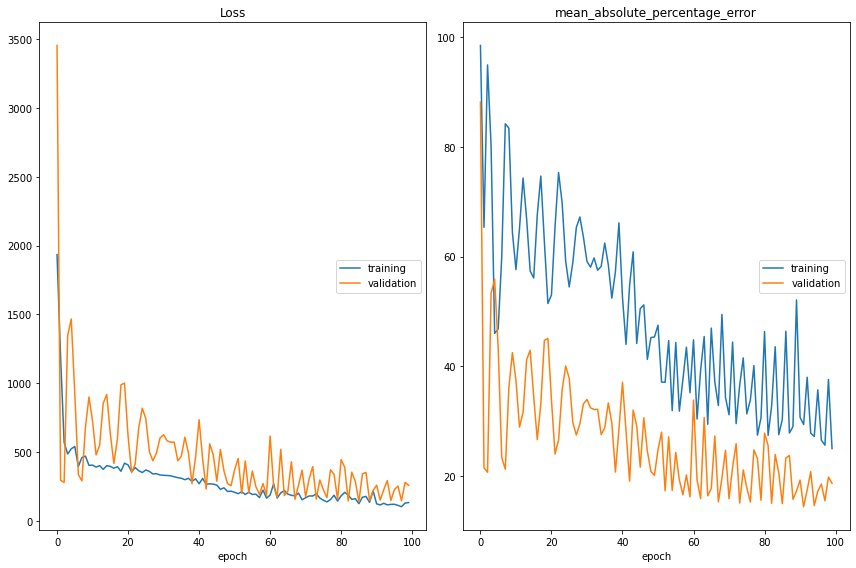

Loss
	training         	 (min:  101.673, max: 1934.316, cur:  132.038)
	validation       	 (min:  139.017, max: 3454.696, cur:  256.717)
mean_absolute_percentage_error
	training         	 (min:   25.040, max:   98.471, cur:   25.040)
	validation       	 (min:   14.454, max:   88.147, cur:   18.723)


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_percentage_error')





history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[PlotLossesCallback()])

# Aplicar o modelo às matrizes de treino

In [20]:
print("Evaluate")
train_mat = tf.expand_dims(train_mat, axis=-1)
result = model2.predict(train_mat)
print(result)

Evaluate


ValueError: in user code:

    File "C:\Users\Carlos Preto\anaconda3\envs\DAA\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Carlos Preto\anaconda3\envs\DAA\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Carlos Preto\anaconda3\envs\DAA\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Carlos Preto\anaconda3\envs\DAA\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\Carlos Preto\anaconda3\envs\DAA\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Carlos Preto\anaconda3\envs\DAA\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 4), found shape=(None, 90, 90, 1, 1)


# Treinar o modelo 2 - com os dados todos do csv mais os resultados do primeiro treino

In [11]:
result = pd.DataFrame(result,columns=['RMage'])
frames = [train_data, result]
new_train_data = pd.concat(frames)



In [12]:
new_train_data.shape

(224, 5)

In [13]:
new_train_data.describe()

,id,age,sex,education,RMage
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,56.500000,44.312500,0.482143,9.035714,39.821503
std,32.475632,22.642156,0.501927,4.909870,18.070717
min,1.000000,13.000000,0.000000,0.000000,14.246252
25%,28.750000,20.000000,0.000000,4.000000,23.023895
50%,56.500000,51.500000,0.000000,9.000000,37.325176
75%,84.250000,65.250000,1.000000,12.000000,54.505424
max,112.000000,79.000000,1.000000,20.000000,78.161743


In [15]:
new_train_data.info()

NameError: name 'new_train_data' is not defined

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, SimpleRNN, Dense

model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(4,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='relu'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,473
Trainable params: 33,473
Non-trainable params: 0
_________________________________________________________________


In [17]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_percentage_error')


x_train = new_train_data.drop(['age'],axis=1)
y_train = new_train_data['age']


history2 = model2.fit(x_train, y_train, epochs=100, batch_size=32,validation_split=0.2, callbacks=[PlotLossesCallback()])

KeyboardInterrupt: 

# Testar o modelo 2

# Prepare submission

In [ ]:
with open("submissao.csv", "w") as sub:
    # Writing data to a file
    sub.write('id,age\n')
    for i in test_data['id']:
        sub.write(str(i)+','+str(int(result[i-1]))+'\n')
    